Titanic Dataset – Storytelling & Brief

Imagine the year is 1912. The RMS Titanic, a luxury ship thought to be “unsinkable,” sets sail on its maiden voyage. Aboard are 891 passengers from different social classes, each with their own stories, dreams, and destinations.

The Human Scale: Out of these passengers, only 342 survived — a survival rate of 38.38%.

Gender Divide: Men outnumbered women (577 males vs 314 females), but women had a significantly higher survival rate due to the “women and children first” evacuation policy.

Age Snapshot: The average passenger age was about 29.7 years, with people ranging from infants to the elderly.

Class System:

3rd class: 491 passengers

1st class: 216 passengers

2nd class: 184 passengers
This social divide played a huge role in survival chances — first-class passengers had better access to lifeboats.

Where They Boarded:

Southampton (S) – 644 passengers

Cherbourg (C) – 168 passengers

Queenstown (Q) – 77 passengers

Fares Paid: Ticket prices ranged from 0 (possibly crew or special cases) to over £512 (luxury first-class cabins). The average fare was £32.20, but this hides massive inequalities between rich and poor.

The Story in Numbers:
The Titanic’s tragedy wasn’t just a maritime disaster — it was a mirror of early 20th-century society, where wealth, gender, and class deeply influenced survival. Each row in the dataset represents a life forever changed by a single night in April 1912.

If you want, I can now create a beautiful visual storytelling dashboard showing survival patterns by gender, age, and class to bring this dataset to life.

In [2]:
#import libraries
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
warnings.filterwarnings("ignore")
import math

In [3]:
#Read Data
df = pd.read_csv("titanic.csv")
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

# **Data Pre-preocessing**

##1- Data Understanding


In [3]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

 As we can see below that **[PassengerId, Name, Ticket]**, are not important feature for our problem, so we may like to **drop them**.

**Drop Un-necessary Columns**

In [4]:
df.drop(["PassengerId", "Name", "Ticket"], axis=1, inplace = True)
df.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Cabin Embarked
0         0       3    male  22.0      1      0   7.2500   NaN        S
1         1       1  female  38.0      1      0  71.2833   C85        C
2         1       3  female  26.0      0      0   7.9250   NaN        S
3         1       1  female  35.0      1      0  53.1000  C123        S
4         0       3    male  35.0      0      0   8.0500   NaN        S

# 2- Check for Datatypes

In [90]:
# Display Datatypes
dtypes = df.dtypes
n_uniq = df.nunique()
pd.DataFrame({"Dtypes": dtypes, "Num_Uniqe": n_uniq}).T

PassengerId Survived Pclass    Name     Sex      Age  SibSp  Parch  \
Dtypes          int64    int64  int64  object  object  float64  int64  int64   
Num_Uniqe         891        2      3     891       2       88      7      7   

           Ticket     Fare   Cabin Embarked  
Dtypes     object  float64  object   object  
Num_Uniqe     681      248     147        3

In [91]:
# Change In-correct Datatypes
cols = ["Pclass", "SibSp", "Parch", "Sex", "Embarked", "Survived"]
df[cols] = df[cols].astype('category')
pd.DataFrame(df.dtypes).T

PassengerId  Survived    Pclass    Name       Sex      Age     SibSp  \
0       int64  category  category  object  category  float64  category   

      Parch  Ticket     Fare   Cabin  Embarked  
0  category  object  float64  object  category

# 3- Check for Null Values

In [92]:
null = df.isnull().sum()
ratio = null / df.shape[0]
pd.DataFrame({"Null_sum": null, "Ratio": ratio}).T

PassengerId  Survived  Pclass  Name  Sex         Age  SibSp  Parch  \
Null_sum          0.0       0.0     0.0   0.0  0.0  177.000000    0.0    0.0   
Ratio             0.0       0.0     0.0   0.0  0.0    0.198653    0.0    0.0   

          Ticket  Fare       Cabin  Embarked  
Null_sum     0.0   0.0  687.000000  2.000000  
Ratio        0.0   0.0    0.771044  0.002245

# Drop Null values in Embarked column

In [93]:
df = df.dropna(subset=['Embarked'])

# Drop Cabin column

In [94]:
df = df.drop("Cabin", axis=1)

# Replace Null Values in Age column

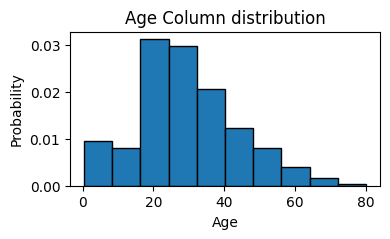

In [95]:
plt.figure(figsize=(4, 2))
plt.hist(df['Age'], density=True, edgecolor="black")
plt.title("Age Column distribution")
plt.xlabel("Age")
plt.ylabel("Probability")
plt.show()

In [96]:
median = df["Age"].median()
df["Age"].fillna(median, inplace=True)

# Make sure that Null values are removed

In [97]:
pd.DataFrame(df.isnull().sum()).T

PassengerId  Survived  Pclass  Name  Sex  Age  SibSp  Parch  Ticket  Fare  \
0            0         0       0     0    0    0      0      0       0     0   

   Embarked  
0         0

# 4- Handle Outliers

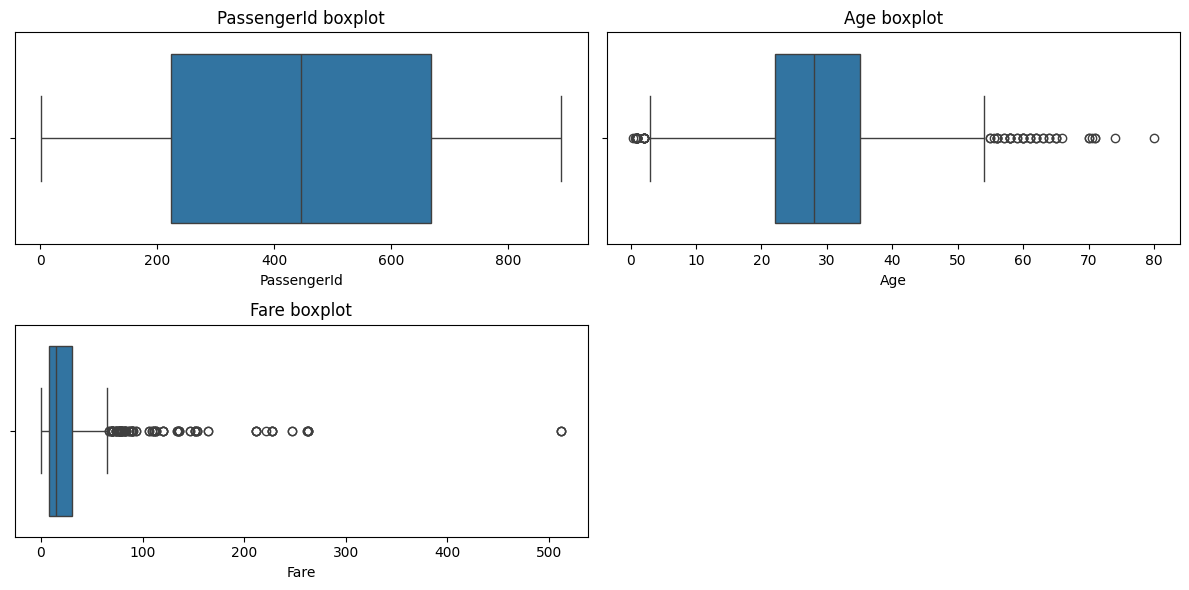

In [128]:
num_cols = df.select_dtypes("number").columns
n_cols = 2
n_rows = math.ceil(len(num_cols) / n_cols)
plt.figure(figsize=(12, n_rows * 3))
for i, col in enumerate(num_cols):
    plt.subplot(n_rows, n_cols, i+1)
    sns.boxplot(x=df[col], orient="h")
    plt.title(f"{col} boxplot")
plt.tight_layout()
plt.show()


# Remove Outliers

In [14]:
for col in num_cols:
    Q1 = df[col].quantile(.25)
    Q3 = df[col].quantile(.75)
    IQR = Q3 - Q1
    Lower_Fence = Q1 - 1.5 * IQR
    Upper_Fence = Q3 + 1.5 * IQR
    Lower_Outliers = df[df[col] < Lower_Fence][col].values
    Upper_Outliers = df[df[col] > Upper_Fence][col].values
    df[col].replace(Lower_Outliers, Lower_Fence, inplace=True)
    df[col].replace(Upper_Outliers, Upper_Fence, inplace=True)

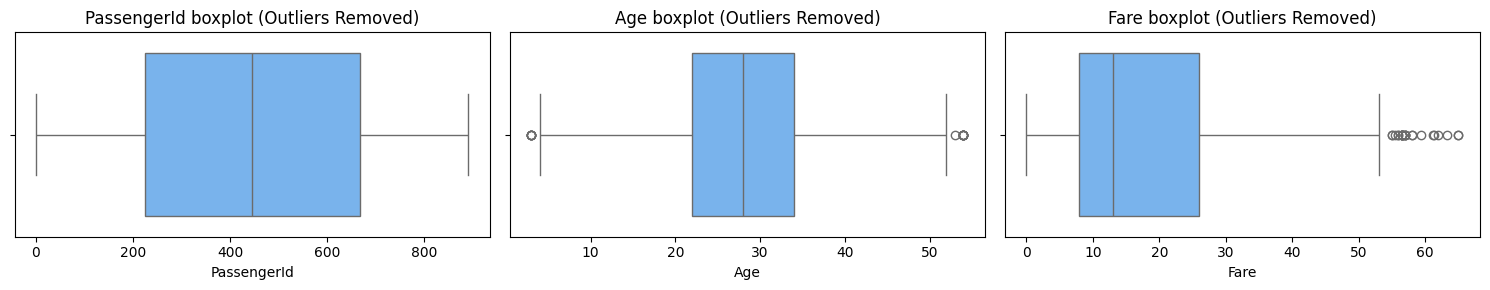

In [130]:
def remove_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series[(series >= lower_bound) & (series <= upper_bound)]
num_cols = df.select_dtypes("number").columns
cols_per_row = 3
n_rows = math.ceil(len(num_cols) / cols_per_row)

plt.figure(figsize=(cols_per_row * 5, n_rows * 3))

for i, col in enumerate(num_cols):
    plt.subplot(n_rows, cols_per_row, i+1)
    cleaned_data = remove_outliers(df[col].dropna())  # Remove NaN and outliers
    sns.boxplot(x=cleaned_data, orient="h", color="#66b3ff")
    plt.title(f"{col} boxplot (Outliers Removed)")

plt.tight_layout()
plt.show()


# Question1: Who had a higher chance of survival: men or women?


In [27]:
Sur_S=df.groupby(['Survived'])[['Sex']].value_counts().reset_index()
Sur_S


Survived     Sex  count
0        0    male    468
1        0  female     81
2        1  female    231
3        1    male    109

In [28]:
Y_A=Sur_S[Sur_S['Survived']==1]
fig=px.pie(Y_A,names='Sex',values='count')
fig.show()

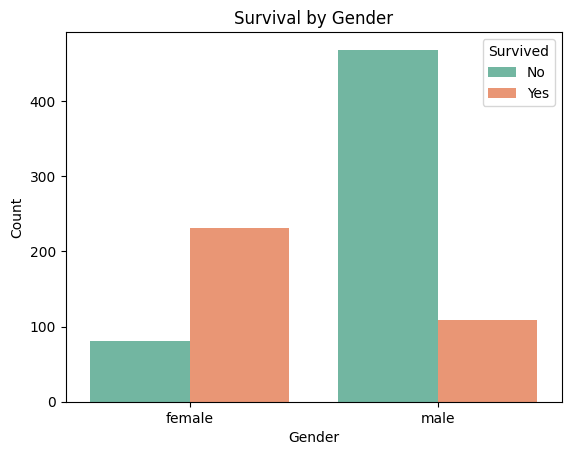

In [38]:
sns.countplot(data=df, x='Sex', hue='Survived', palette='Set2')
plt.title('Survival by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

# Answer: Women had a much higher survival rate compared to men, as seen in the first chart where the majority of women survived, while most men did not.

# Question2: Did social class affect survival chances?

In [25]:
#social class affect survival chances?==use barchart
Sur_C=df.groupby(['Survived'])[['Pclass']].value_counts().reset_index()
Sur_C


Survived Pclass  count
0        0      3    372
1        0      2     97
2        0      1     80
3        1      1    134
4        1      3    119
5        1      2     87

In [26]:
Y_C=Sur_C[Sur_C['Survived']==1]
fig=px.bar(Y_C,x='Pclass',y='count')
fig.show()

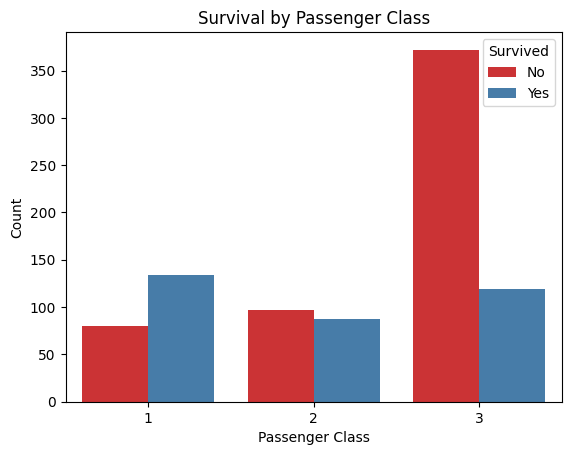

In [39]:
sns.countplot(data=df, x='Pclass', hue='Survived', palette='Set1')
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

#Answer: Yes. First-class passengers had a significantly higher survival rate, while third-class passengers had the lowest chance of survival.



#  Question3: Did age impact survival rates?

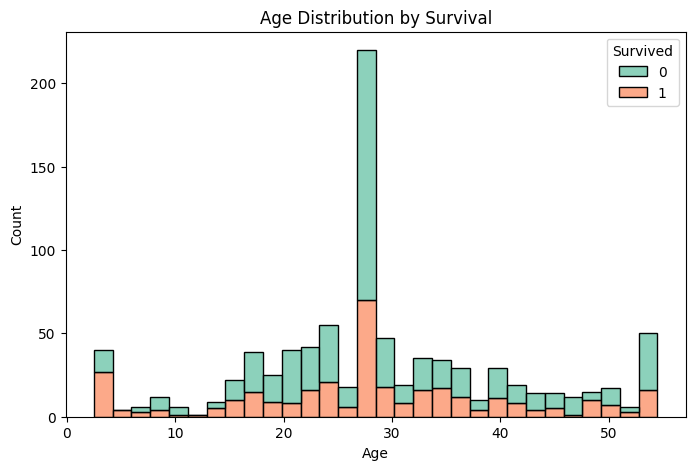

In [36]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', palette='Set2', bins=30)
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Answer: Yes. Younger passengers, especially children, had better survival chances, while middle-aged and older passengers had lower chances.



# Q4 – Did the port of embarkation affect survival?

In [43]:
# embarkation affect survival
Sur_E=df.groupby(['Survived'])[['Embarked']].value_counts().reset_index()
Sur_E

Survived Embarked  count
0        0        S    427
1        0        C     75
2        0        Q     47
3        1        S    217
4        1        C     93
5        1        Q     30

In [49]:
Y_S=Sur_E[Sur_E['Survived']==1]
fig=px.pie(Y_S,names='Embarked',values='count')
fig.show()

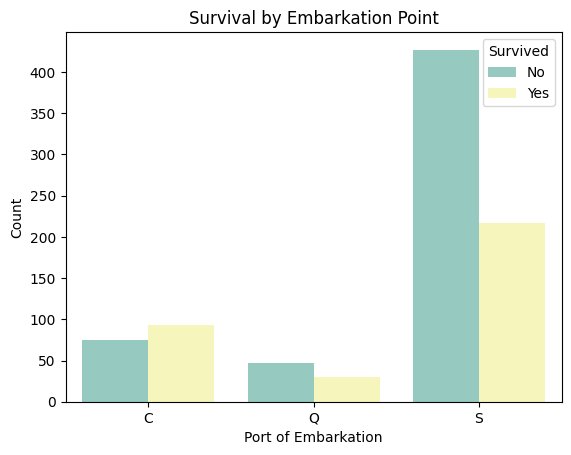

In [50]:
sns.countplot(data=df, x='Embarked', hue='Survived', palette='Set3')
plt.title('Survival by Embarkation Point')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

# Answer: Yes. Passengers boarding from Cherbourg (C) had the highest survival rate, while most passengers from Southampton (S) did not survive.


# Question5: Which group had the lowest survival rate?


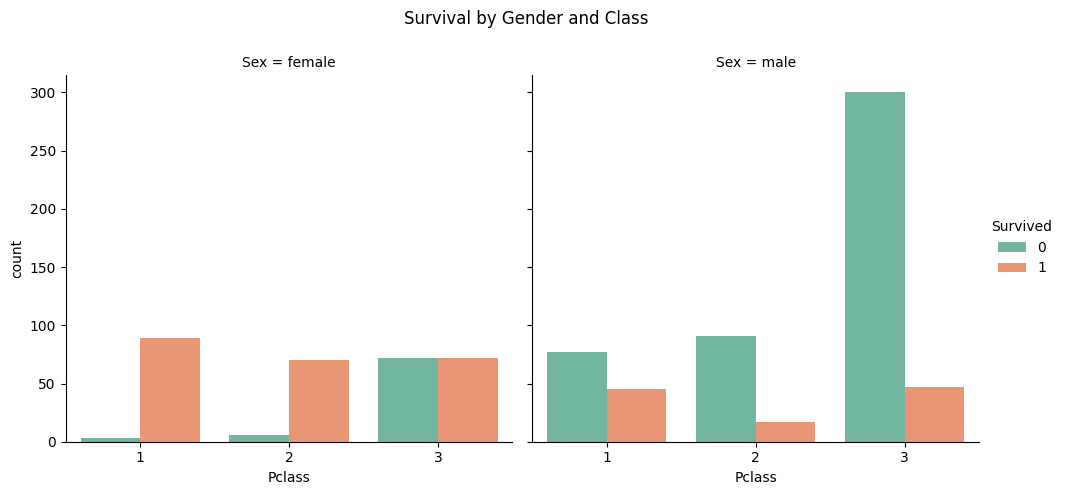

In [52]:
sns.catplot(data=df, x='Pclass', hue='Survived', col='Sex', kind='count', palette='Set2')
plt.subplots_adjust(top=0.85)
plt.suptitle('Survival by Gender and Class')
plt.show()

# Answer: Male passengers in third class had the lowest survival rate overall.



# Question6: What was the most common passenger class?


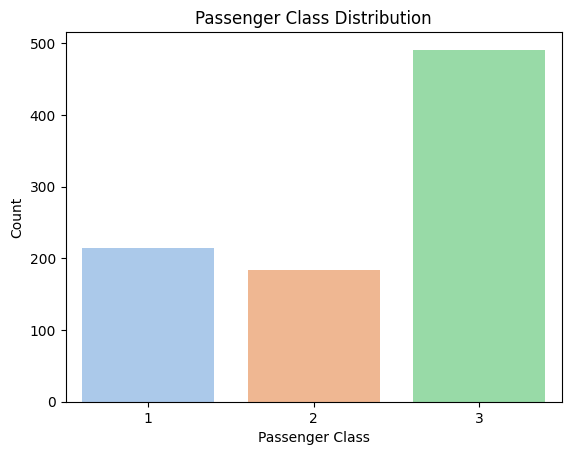

In [53]:
sns.countplot(data=df, x='Pclass', palette='pastel')
plt.title('Passenger Class Distribution')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

# Answer: Third class was the most common, with 491 passengers, followed by first class (216) and second class (184).


# Question7: Was there a large difference in ticket prices?


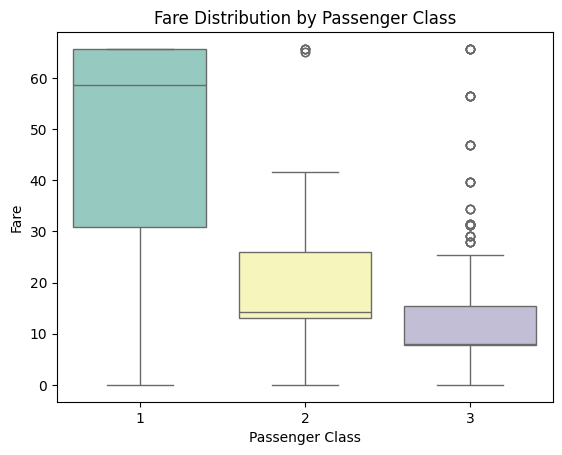

In [54]:
#large difference in ticket prices
sns.boxplot(data=df, x='Pclass', y='Fare', palette='Set3')
plt.title('Fare Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()

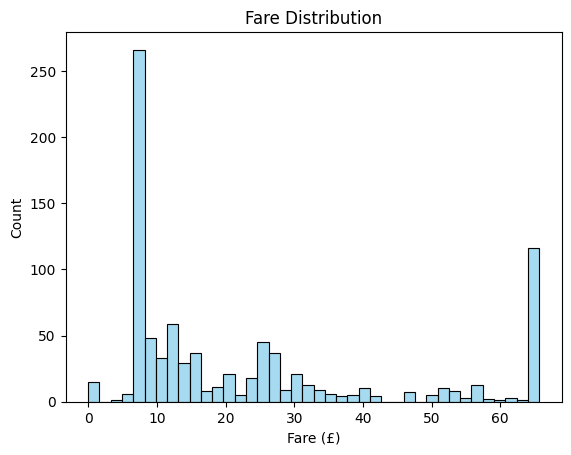

In [55]:
sns.histplot(df['Fare'], bins=40, color='skyblue')
plt.title('Fare Distribution')
plt.xlabel('Fare (£)')
plt.ylabel('Count')
plt.show()

# Answer: Yes. Fares ranged from £0 to over £512, showing a huge economic gap between passengers.



# Question8: Did traveling alone or with family impact survival?


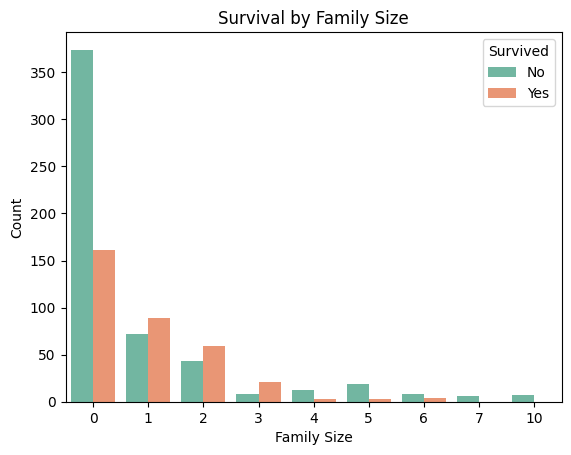

In [62]:
# Did traveling alone or with family impact survival
# Convert SibSp and Parch to numeric before adding
df['SibSp'] = pd.to_numeric(df['SibSp'], errors='coerce')
df['Parch'] = pd.to_numeric(df['Parch'], errors='coerce')
# Create FamilySize column
df['FamilySize'] = df['SibSp'] + df['Parch']
sns.countplot(data=df, x='FamilySize', hue='Survived', palette='Set2')
plt.title('Survival by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


# Answer: Passengers traveling with family (siblings/spouses or parents/children) had slightly better survival chances, likely due to group evacuation.



# Question9: Was survival purely random?


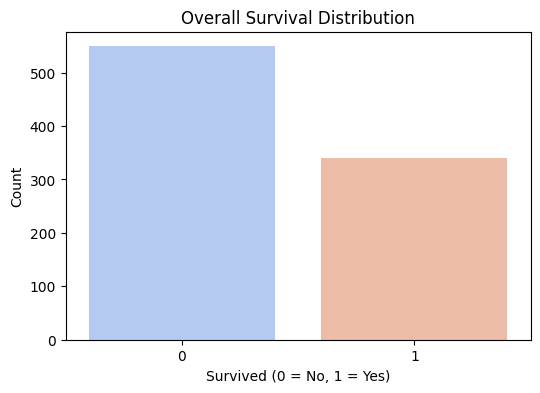

In [131]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Survived', palette='coolwarm')
plt.title('Overall Survival Distribution')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# Answer: No. Survival was strongly influenced by gender, age, social class, and even the port of embarkation.


# Q10 – Which age group had the highest survival rate?



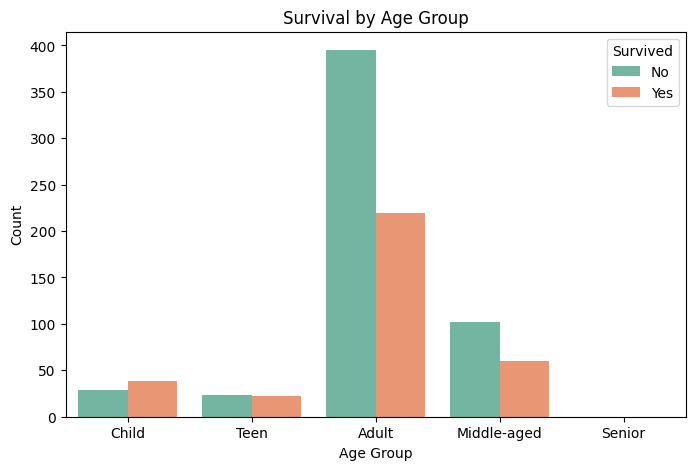

In [65]:
bins = [0, 12, 18, 40, 60, 80]
labels = ['Child', 'Teen', 'Adult', 'Middle-aged', 'Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='AgeGroup', hue='Survived', palette='Set2')
plt.title('Survival by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

# Children had the highest survival rate, followed by teenagers. Seniors had the lowest survival rate.

# Q11 – Did higher ticket prices increase survival chances?


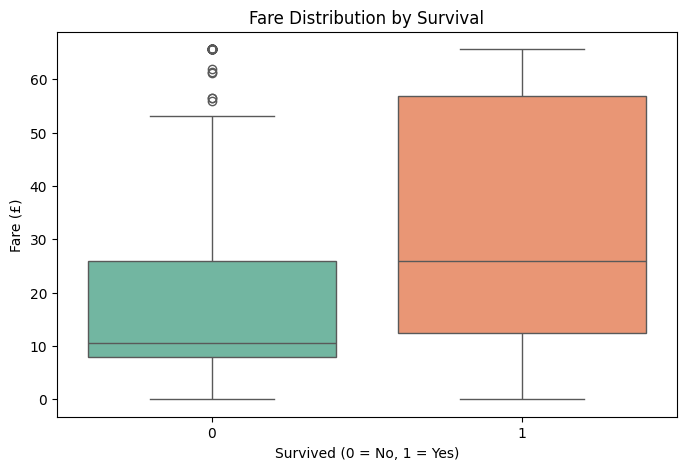

In [66]:
sns.boxplot(data=df, x='Survived', y='Fare', palette='Set2')
plt.title('Fare Distribution by Survival')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Fare (£)')
plt.show()

# Yes. Passengers who paid higher fares generally had a better chance of survival, likely because they were in first class.



# Q12 – Were children prioritized in rescue efforts?


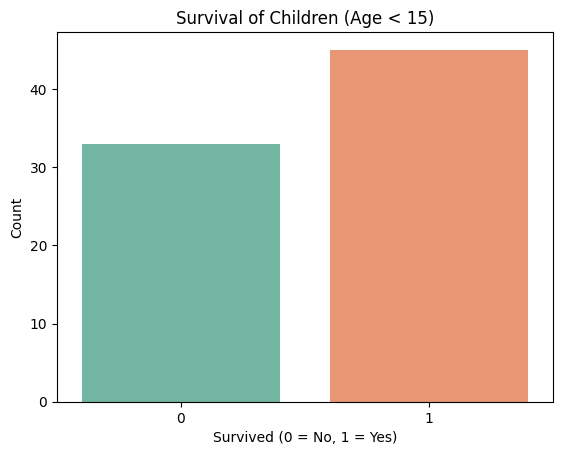

In [67]:
sns.countplot(data=df[df['Age'] < 15], x='Survived', palette='Set2')
plt.title('Survival of Children (Age < 15)')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

In [70]:
fig=px.pie(df[df['Age'] < 15],names='Survived',values='Age')
fig.show()

# Yes. Many children survived compared to adults, showing that children were given priority in evacuation.

# Q13 – Did survival rate differ between alone and large families?



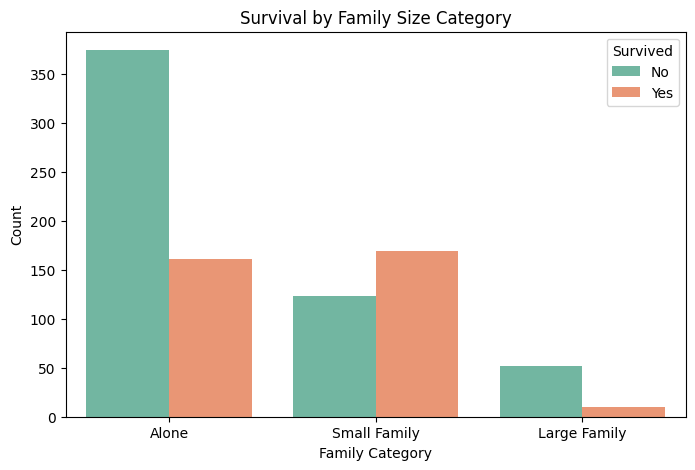

In [68]:
df['FamilySize'] = pd.to_numeric(df['SibSp'], errors='coerce') + pd.to_numeric(df['Parch'], errors='coerce')
df['FamilyCategory'] = pd.cut(df['FamilySize'], bins=[-1,0,3,10], labels=['Alone', 'Small Family', 'Large Family'])
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='FamilyCategory', hue='Survived', palette='Set2')
plt.title('Survival by Family Size Category')
plt.xlabel('Family Category')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

# Passengers with small families had the highest survival rate, while those traveling alone or with very large families had lower chances.



# Q14 – Which combination of gender and class had the highest survival rate?

<Figure size 800x500 with 0 Axes>

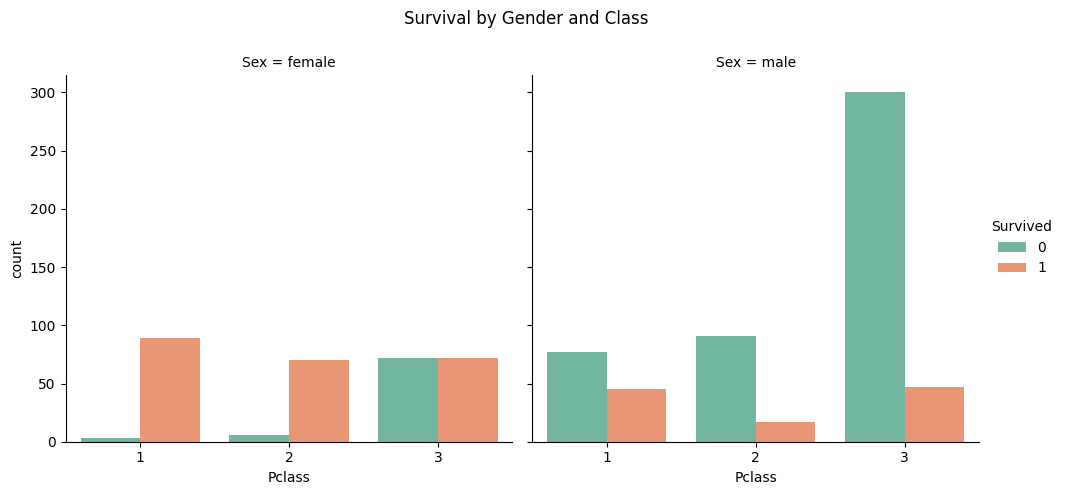

In [69]:
plt.figure(figsize=(8,5))
sns.catplot(data=df, x='Pclass', hue='Survived', col='Sex', kind='count', palette='Set2')
plt.subplots_adjust(top=0.85)
plt.suptitle('Survival by Gender and Class')
plt.show()

# First-class females had the highest survival rate, followed by second-class females. Third-class males had the lowest survival rate.



# Q15 – Did survival rates differ between embarkation ports after adjusting for class?


<Figure size 1000x600 with 0 Axes>

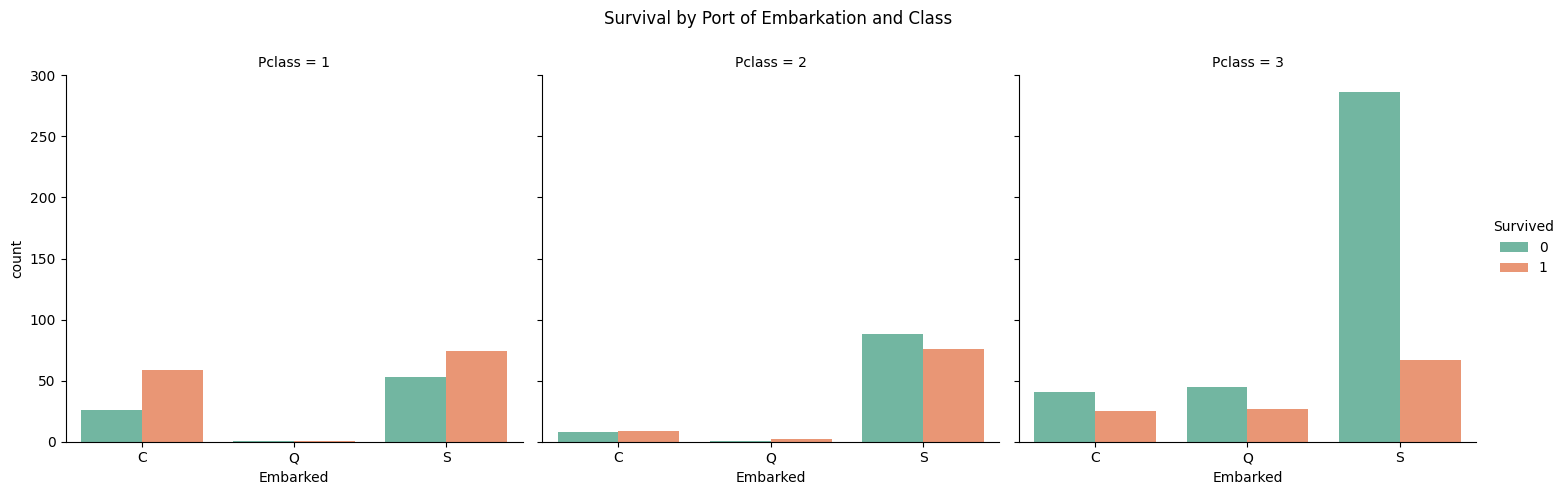

In [71]:
plt.figure(figsize=(10,6))
sns.catplot(data=df, x='Embarked', hue='Survived', col='Pclass', kind='count', palette='Set2')
plt.subplots_adjust(top=0.85)
plt.suptitle('Survival by Port of Embarkation and Class')
plt.show()

#Yes. Passengers embarking from Cherbourg had the highest survival rates, even when comparing the same classes.



#Q16 – Did younger females have higher survival chances than older females?


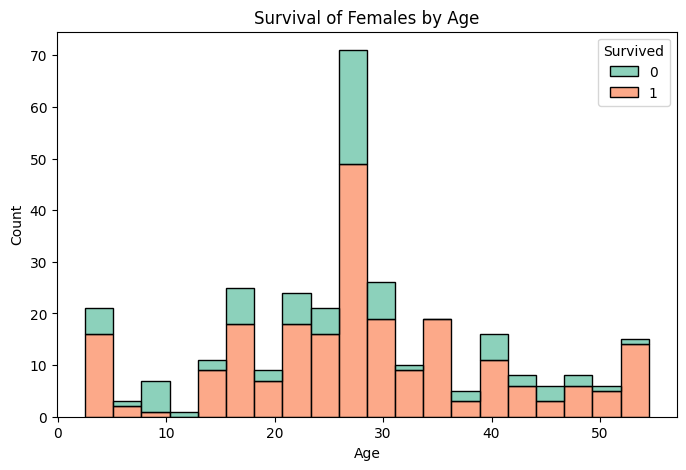

In [72]:
female_df = df[df['Sex'] == 'female']
plt.figure(figsize=(8,5))
sns.histplot(data=female_df, x='Age', hue='Survived', multiple='stack', palette='Set2', bins=20)
plt.title('Survival of Females by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [76]:
fig=px.pie(female_df,names='Survived',values='Age')
fig.show()

#Yes. Younger females had a noticeably higher survival rate than older females.



# Q17 – What percentage of passengers in each class survived?


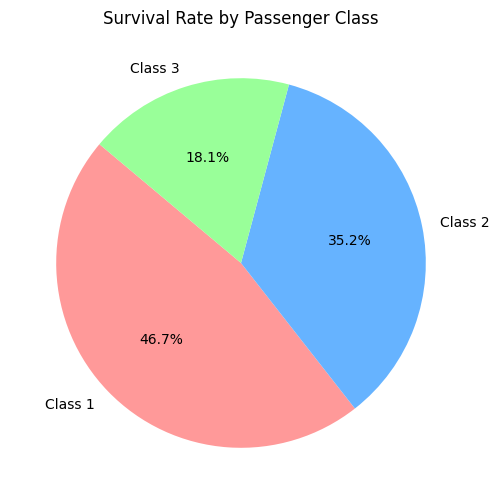

In [85]:
# Ensure numeric types
df['Pclass'] = pd.to_numeric(df['Pclass'], errors='coerce')
df['Survived'] = pd.to_numeric(df['Survived'], errors='coerce')

# Calculate survival percentage by class
class_survival = df.groupby('Pclass')['Survived'].mean() * 100

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(
    class_survival,
    labels=[f'Class {int(c)}' for c in class_survival.index],
    autopct='%1.1f%%',
    startangle=140,
    colors=['#ff9999','#66b3ff','#99ff99']
)
plt.title('Survival Rate by Passenger Class')
plt.show()


#Around 62% in first class survived, 47% in second class, and only about 24% in third class survived.



# Q18 – Were there passengers with zero fare, and did they survive?


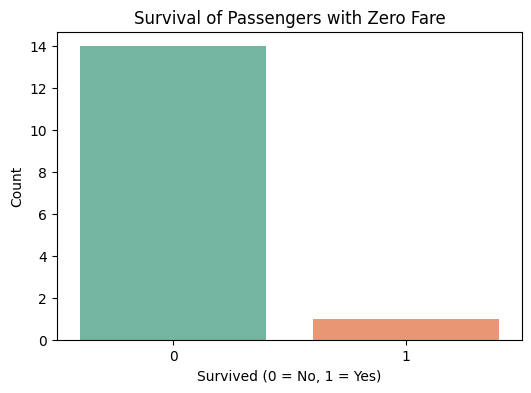

In [78]:
zero_fare_df = df[df['Fare'] == 0]
plt.figure(figsize=(6,4))
sns.countplot(data=zero_fare_df, x='Survived', palette='Set2')
plt.title('Survival of Passengers with Zero Fare')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

#Yes, there were a few passengers with a fare of zero, and most of them did not survive.



**A. Data Distribution Graphs**

# Numerical Data Distribution Graphs

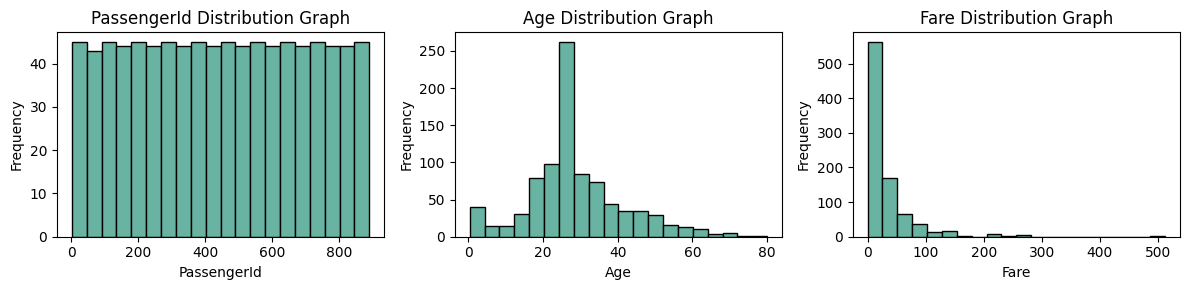

In [133]:
# Select numeric columns
num_cols = df.select_dtypes("number").columns

n_cols = 3
n_rows = math.ceil(len(num_cols) / n_cols)
plt.figure(figsize=(n_cols * 4, n_rows * 3))
for i, col in enumerate(num_cols):
    plt.subplot(n_rows, n_cols, i+1)
    plt.hist(df[col], bins=20, edgecolor="black", color="#69b3a2")
    plt.title(f"{col} Distribution Graph")
    plt.xlabel(col)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

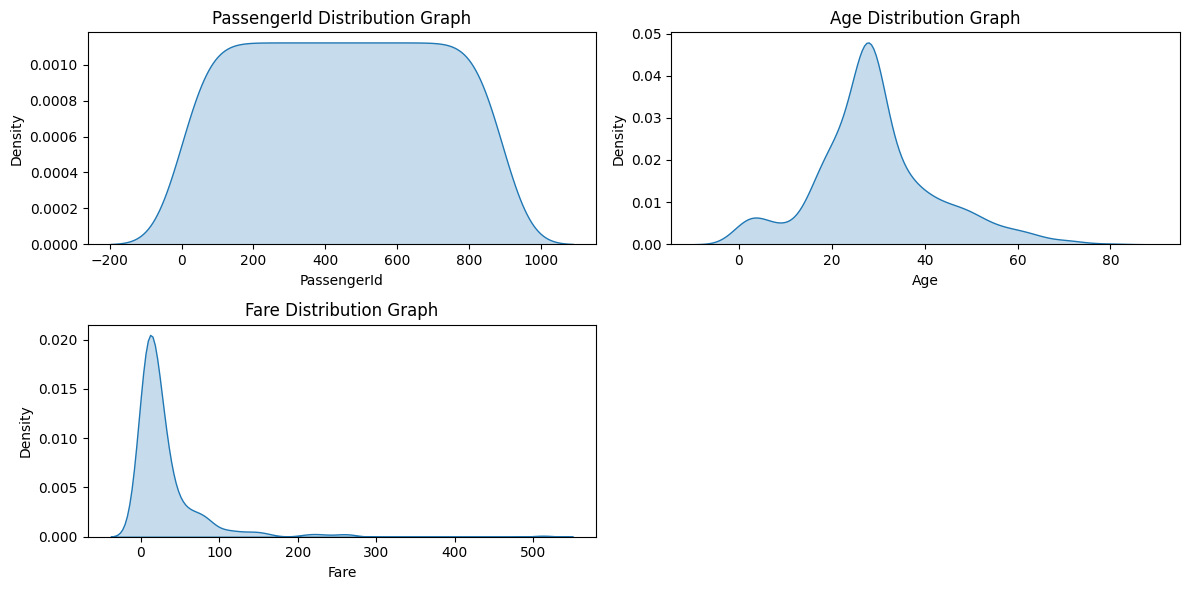

In [134]:
num_cols = df.select_dtypes("number").columns
n_cols = 2
n_rows = math.ceil(len(num_cols) / n_cols)
plt.figure(figsize=(12, n_rows * 3))
for i, col in enumerate(num_cols):
    plt.subplot(n_rows, n_cols, i+1)
    sns.kdeplot(df[col], fill=True)
    plt.title(f"{col} Distribution Graph")
plt.tight_layout()
plt.show()


# Categorical Data Distribution Graphs

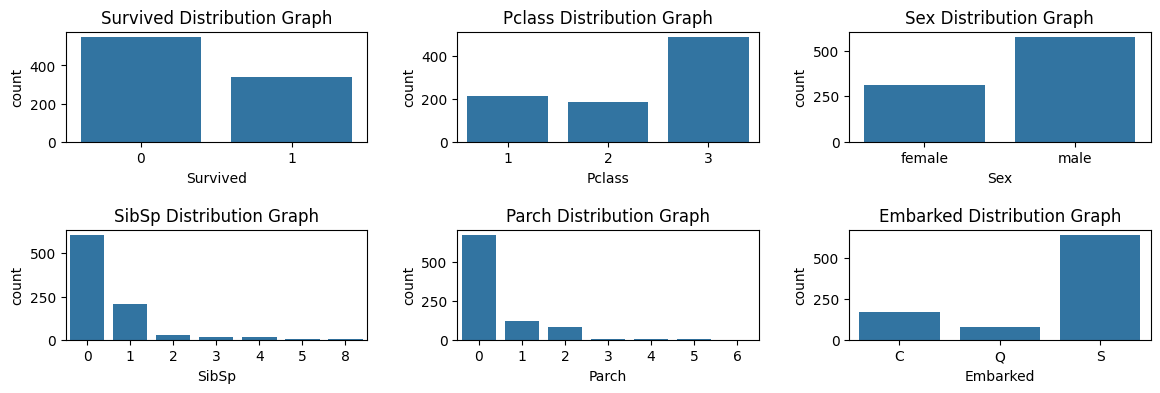

In [114]:
# Count Plot
cat_cols = df.select_dtypes("category").columns
plt.figure(figsize=(14, 4))
for i, col in enumerate(cat_cols):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=col, data=df)
    plt.title(f"{col} Distribution Graph")
plt.subplots_adjust(hspace=.8, wspace=.3)
plt.show()

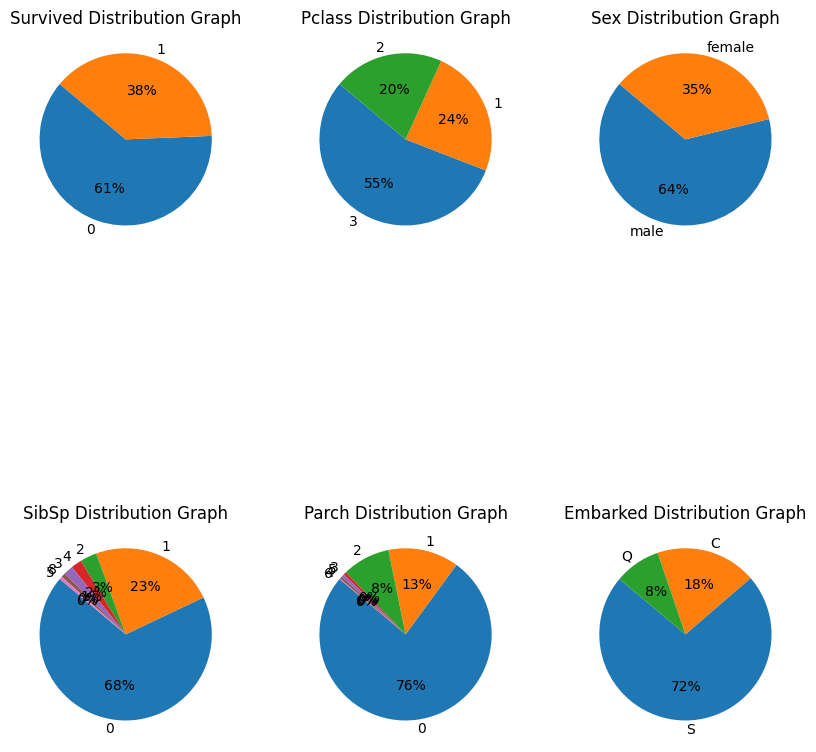

In [119]:
# Pie Plot (not recommended)
cat_cols = df.select_dtypes("category").columns
plt.figure(figsize=(10, 10))
for i, col in enumerate(cat_cols):
    plt.subplot(2, 3, i+1)
    unique = df[col].value_counts()
    count = unique.values
    categories = unique.index
    plt.pie(count, labels = categories, startangle=140, autopct='%1.1d%%')
    plt.title(f"{col} Distribution Graph")
plt.subplots_adjust(hspace=.8, wspace=.3)
plt.show()

# B. Outlier Detection Graphs

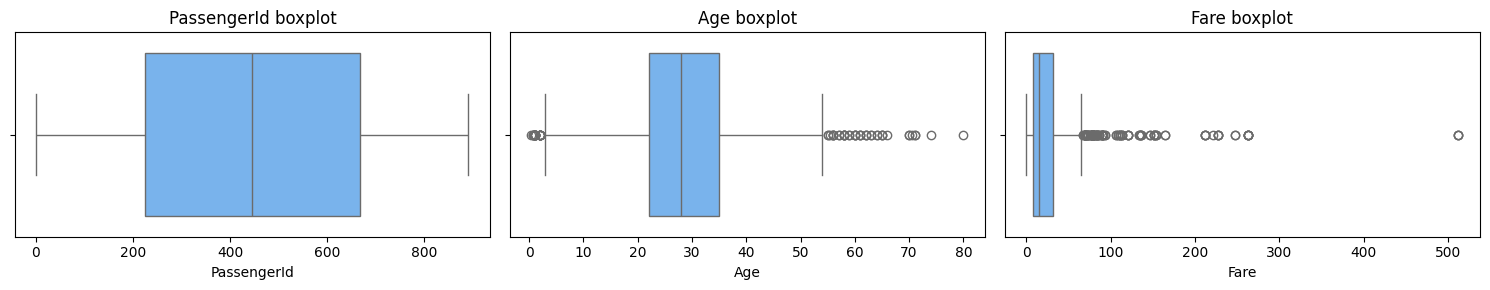

In [124]:
num_cols = df.select_dtypes("number").columns
cols_per_row = 3
n_rows = math.ceil(len(num_cols) / cols_per_row)
plt.figure(figsize=(cols_per_row * 5, n_rows * 3))
for i, col in enumerate(num_cols):
    plt.subplot(n_rows, cols_per_row, i+1)
    sns.boxplot(x=df[col], orient="h", color="#66b3ff")
    plt.title(f"{col} boxplot")
plt.tight_layout()
plt.show()

#Numerical/Numerical Relationship

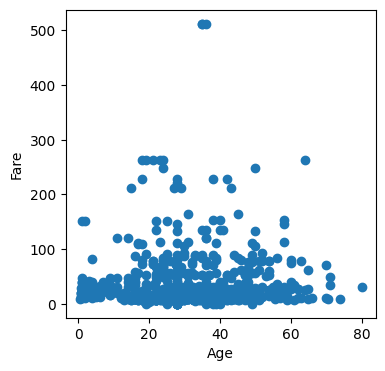

In [140]:
# Scatter Plot
plt.figure(figsize=(4, 4))
plt.scatter(df["Age"], df["Fare"])
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

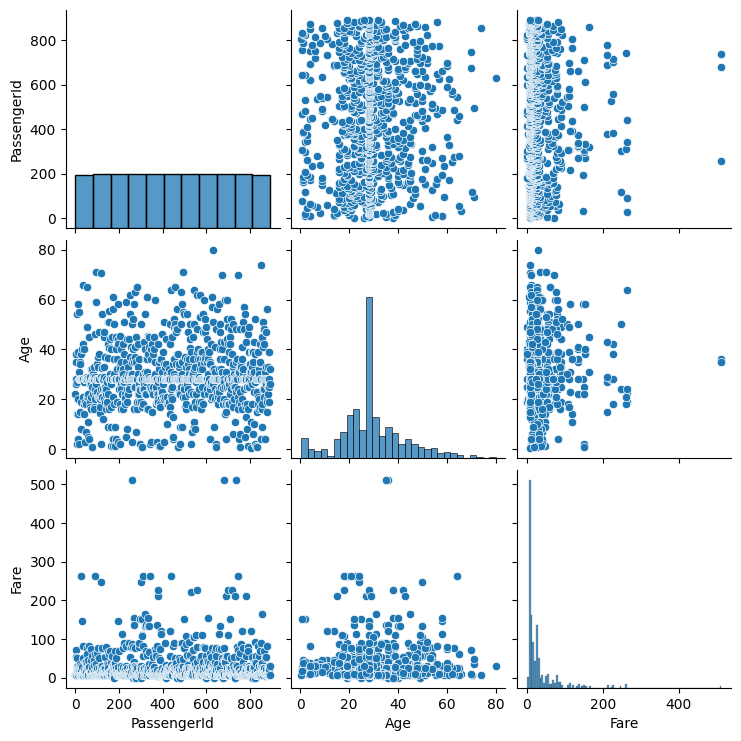

In [138]:
# Pair Plot
sns.pairplot(df)

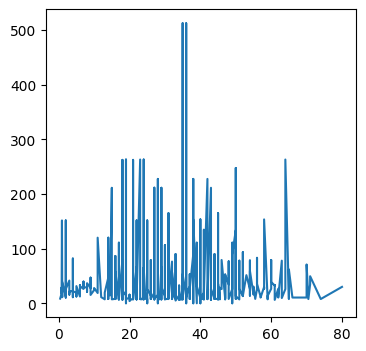

In [141]:
# Line Plot
sorted_df = df.sort_values(by="Age")
plt.figure(figsize=(4, 4))
plt.plot(sorted_df["Age"], sorted_df["Fare"])
plt.show()

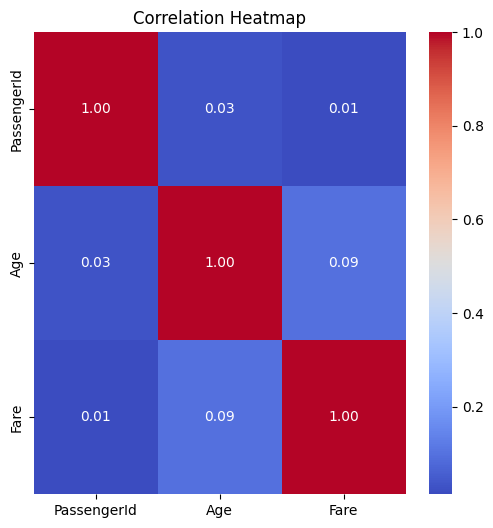

In [143]:
numeric_df = df.select_dtypes(include=["number"])
corr = numeric_df.corr()
plt.figure(figsize=(6, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Categorical/Categorical Relationship

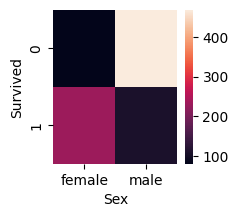

In [144]:
# Heat map
plt.figure(figsize=(2, 2))
agg = df.pivot_table(index="Survived", columns="Sex", values="Age", aggfunc=len)
sns.heatmap(agg)
plt.show()

# 6- Remove Duplicates

In [145]:
df.duplicated().sum()

np.int64(0)

In [146]:
#Remove duplicate
df.drop_duplicates(inplace=True)

# 7- Data Splitting

In [147]:
X = df.drop("Survived", axis=1)
y = df[["Survived"]]

# 8- Normalization

In [148]:
from sklearn.preprocessing import MinMaxScaler
num_cols = X.select_dtypes("number").columns
scaler = MinMaxScaler()
scaler.fit(X[num_cols])
X[num_cols] = scaler.transform(X[num_cols])

#9- Encoding

In [149]:
str_cols = ["Sex", "Embarked"]
pd.DataFrame(X[str_cols].nunique()).T

Sex  Embarked
0    2         3

In [151]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.1 MB/s eta 0:00:00


In [152]:
from category_encoders import OneHotEncoder
encoder = OneHotEncoder(cols = str_cols, drop_invariant=True)
X = encoder.fit_transform(X)

In [153]:
pip install ydata_profiling


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.0/679.0 kB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.7/37.7 MB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=397b1ab2c3e5e0fcb02504755d4ef2892acdc0051db1ea08d441eaaa7fa1a84f
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.1
    Uninstalling scipy-1.16.1:
     

In [4]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Titanic Profiling Report")
profile.to_file("report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 12/12 [00:00<00:00, 47.44it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Conclusion
The tragedy of the Titanic remains one of the most heartbreaking maritime disasters in modern history. A ship once hailed as “unsinkable” met its fate on its maiden voyage in 1912, leaving behind stories of bravery, fear, sacrifice, and shock.
While to many it might have seemed like a random disaster, the data tells a different story — survival was far from evenly distributed. Instead, it was shaped by clear social and demographic factors.

Through analyzing the passenger data, several key insights emerged:

Passenger Class (Pclass) & Survival

First-class passengers had the highest survival rates.

Third-class passengers had the lowest.

Social and economic status played a decisive role in survival.

Gender

Women survived at much higher rates than men.

This aligns with the “women and children first” evacuation principle.

Age

Children, especially those under 10, had higher survival chances.

Older passengers were less likely to survive.

Traveling Alone vs. With Family

Those traveling with family had slightly better survival chances.

Family bonds likely helped during the evacuation.

Port of Embarkation

Passengers boarding from Cherbourg had higher survival rates.

This is linked to a larger proportion of first-class passengers from that port.

Ticket Fare

Higher ticket prices correlated with higher survival chances.

This reflects the link between wealth and safety.

Correlation Insights (Heatmap)

Strong negative correlation between passenger class and survival.

Moderate positive correlation between fare and survival.

Weak negative correlation between age and survival.

Final Takeaway:
The sinking of the Titanic was not just a maritime accident — it was a reflection of the social structure of the time. Class, gender, and age were critical factors determining who lived and who didn’t. The numbers reveal what the stories hint at: even in moments of chaos, human survival is shaped by societal inequalities.